<a href="https://colab.research.google.com/github/c-w-m/btap/blob/master/ch02/API_Data_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original source: [**Blueprints for Text Analysis Using Python**](https://github.com/blueprints-for-text-analytics-python/blueprints-text)<br>
Jens Albrecht, Sidharth Ramachandran, Christian Winkler

# Chapter 2: API Data Extraction<div class='tocSkip'/>

## Remark<div class='tocSkip'/>

The code in this notebook differs slightly from the printed book. For example we frequently use pretty print (`pp.pprint`) instead of `print` and `tqdm`'s `progress_apply` instead of Pandas' `apply`. 

Moreover, several layout and formatting commands, like `figsize` to control figure size or subplot commands are removed in the book.

You may also find some lines marked with three hashes ###. Those are not in the book as well as they don't contribute to the concept.

All of this is done to simplify the code in the book and put the focus on the important parts instead of formatting.

## Setup<div class='tocSkip'/>

Set directory locations. If working on Google Colab: copy files and install required libraries.

In [1]:
import sys, os
ON_COLAB = 'google.colab' in sys.modules

if ON_COLAB:
    GIT_ROOT = 'https://github.com/c-w-m/btap/raw/master'
    os.system(f'wget {GIT_ROOT}/ch02/setup.py')

%run -i setup.py

You are working on Google Colab.
Files will be downloaded to "/content".
!wget -P /content https://github.com/c-w-m/btap/raw/master/settings.py
!wget -P /content/packages/blueprints https://github.com/c-w-m/btap/raw/master/packages/blueprints/exploration.py
!wget -P /content/ch02 https://github.com/c-w-m/btap/raw/master/ch02/requirements.txt
!wget -P /content/ch02 https://github.com/c-w-m/btap/raw/master/ch02/Tweets_01:01:36.656960.txt

Additional setup ...
!pip install -r ch02/requirements.txt
!python -m nltk.downloader stopwords


## Load Python Settings<div class="tocSkip"/>

Common imports, defaults for formatting in Matplotlib, Pandas etc.

In [2]:
%run "$BASE_DIR/settings.py"

if ON_COLAB:
    %reload_ext autoreload
    %autoreload 2

%config InlineBackend.figure_format = 'png'

# to print output of all statements and not just the last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# otherwise text between $ signs will be interpreted as formula and printed in italic
pd.set_option('display.html.use_mathjax', False)

# path to import blueprints packages
sys.path.append(BASE_DIR + '/packages')

In [3]:
# adjust matplotlib resolution for book version
matplotlib.rcParams.update({'figure.dpi': 200 })

# How to use APIs to extract and derive insights from text data

# Application Programming Interface

# Blueprint - Extracting data from an API using the requests module

In [4]:
import requests

response = requests.get('https://api.github.com/repositories',
                        headers={'Accept': 'application/vnd.github.v3+json'})
print(response.status_code)

200


In [5]:
print('encoding: {}'.format(response.encoding))
print('Content-Type: {}'.format(response.headers['Content-Type']))
print('server: {}'.format(response.headers['server']))

encoding: utf-8
Content-Type: application/json; charset=utf-8
server: GitHub.com


In [6]:
response.headers

{'Server': 'GitHub.com', 'Date': 'Wed, 21 Apr 2021 06:51:16 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept, Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"2b44a0cea00056e0e9ee543de83bcf14d973573bb77d4f86439e9522e8f31fab"', 'X-GitHub-Media-Type': 'github.v3; format=json', 'Link': '<https://api.github.com/repositories?since=369>; rel="next", <https://api.github.com/repositories{?since}>; rel="first"', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '0', 'Referrer-Policy': 'origin-when-cross-origin,

In [7]:
import json
print(json.dumps(response.json()[0], indent=2)[:200])

{
  "id": 1,
  "node_id": "MDEwOlJlcG9zaXRvcnkx",
  "name": "grit",
  "full_name": "mojombo/grit",
  "private": false,
  "owner": {
    "login": "mojombo",
    "id": 1,
    "node_id": "MDQ6VXNlcjE=",



In [8]:
response = requests.get('https://api.github.com/search/repositories')
print(response.status_code)

422


In [9]:
response = requests.get('https://api.github.com/search/repositories',
    params={'q': 'data_science+language:python'},
    headers={'Accept': 'application/vnd.github.v3.text-match+json'})
print(response.status_code)

200


In [10]:
from IPython.display import Markdown, display  ###
def printmd(string):  ###
    display(Markdown(string))  ###

for item in response.json()['items'][:5]:
    printmd('**' + item['name'] + '**' + ': repository ' +
            item['text_matches'][0]['property'] + ' - \"*' +
            item['text_matches'][0]['fragment'] + '*\" matched with ' + '**' +
            item['text_matches'][0]['matches'][0]['text'] + '**')

**data-science-from-scratch**: repository description - "*code for Data Science From Scratch book*" matched with **Data Science**

**data-science-blogs**: repository description - "*A curated list of data science blogs*" matched with **data science**

**data-scientist-roadmap**: repository description - "*Toturial coming with "data science roadmap" graphe.*" matched with **data science**

**galaxy**: repository description - "*Data intensive science for everyone.*" matched with **Data**

**dsp**: repository description - "*data science preparation*" matched with **data science**

In [11]:
response = requests.get(
    'https://api.github.com/repos/pytorch/pytorch/issues/comments')
print('Response Code', response.status_code)
print('Number of comments', len(response.json()))

Response Code 200
Number of comments 30


In [12]:
response.links

{'last': {'rel': 'last',
  'url': 'https://api.github.com/repositories/65600975/issues/comments?page=1334'},
 'next': {'rel': 'next',
  'url': 'https://api.github.com/repositories/65600975/issues/comments?page=2'}}

In [13]:
def get_all_pages(url, params=None, headers=None):
    output_json = []
    response = requests.get(url, params=params, headers=headers)
    if response.status_code == 200:
        output_json = response.json()
        if 'next' in response.links:
            next_url = response.links['next']['url']
            if next_url is not None:
                output_json += get_all_pages(next_url, params, headers)
    return output_json


out = get_all_pages(
    "https://api.github.com/repos/pytorch/pytorch/issues/comments",
    params={
        'since': '2020-07-01T10:00:01Z',
        'sorted': 'created',
        'direction': 'desc'
    },
    headers={'Accept': 'application/vnd.github.v3+json'})
df = pd.DataFrame(out)

In [14]:
pd.set_option('display.max_colwidth', -1)
if ('body' in df.index):
    print(df['body'].count())
    print(df[['id','created_at','body']].sample(1, random_state=42))

In [15]:
response = requests.head(
    'https://api.github.com/repos/pytorch/pytorch/issues/comments')
print('X-Ratelimit-Limit', response.headers['X-Ratelimit-Limit'])
print('X-Ratelimit-Remaining', response.headers['X-Ratelimit-Remaining'])

# Converting UTC time to human-readable format
import datetime
print(
    'Rate Limits reset at',
    datetime.datetime.fromtimestamp(int(
        response.headers['X-RateLimit-Reset'])).strftime('%c'))

X-Ratelimit-Limit 60
X-Ratelimit-Remaining 56
Rate Limits reset at Wed Apr 21 07:51:16 2021


In [16]:
from datetime import datetime
import time

def handle_rate_limits(response):
    now = datetime.now()
    reset_time = datetime.fromtimestamp(
        int(response.headers['X-RateLimit-Reset']))
    remaining_requests = response.headers['X-Ratelimit-Remaining']
    remaining_time = (reset_time - now).total_seconds()
    intervals = remaining_time / (1.0 + int(remaining_requests))
    print('Sleeping for', intervals)
    time.sleep(intervals)
    return True

In [17]:
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

retry_strategy = Retry(
    total=5,
    status_forcelist=[500, 503, 504],
    backoff_factor=1
)

retry_adapter = HTTPAdapter(max_retries=retry_strategy)

http = requests.Session()
http.mount("https://", retry_adapter)
http.mount("http://", retry_adapter)

response = http.get('https://api.github.com/search/repositories',
                   params={'q': 'data_science+language:python'})

for item in response.json()['items'][:5]:
    print(item['name'])

data-science-from-scratch
data-science-blogs
data-scientist-roadmap
galaxy
dsp


In [18]:
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

retry_strategy = Retry(
    total=5,
    status_forcelist=[500, 503, 504],
    backoff_factor=1
)

retry_adapter = HTTPAdapter(max_retries=retry_strategy)

http = requests.Session()
http.mount("https://", retry_adapter)
http.mount("http://", retry_adapter)

def get_all_pages(url, param=None, header=None):
    output_json = []
    response = http.get(url, params=param, headers=header)
    if response.status_code == 200:
        output_json = response.json()
        if 'next' in response.links:
            next_url = response.links['next']['url']
            if (next_url is not None) and (handle_rate_limits(response)): 
                output_json += get_all_pages(next_url, param, header)
    return output_json

In [19]:
out = get_all_pages("https://api.github.com/repos/pytorch/pytorch/issues/comments", param={'since': '2020-04-01T00:00:01Z'})
df = pd.DataFrame(out)

# Blueprint - Extracting Twitter data with Tweepy

In [20]:
import tweepy

app_api_key = 'YOUR_APP_KEY_HERE' 
app_api_secret_key = 'YOUR_APP_SECRET_HERE'

app_api_key = 'CWIBFKPrcOU4GsdRr6J5fpaps'
app_api_secret_key = 'SghP0LINUECDj0PzIi1vmDfRtNopqJNfb5xd3fH7XpO9ZaEtme'

auth = tweepy.AppAuthHandler(app_api_key, app_api_secret_key)
api = tweepy.API(auth)

print('API Host: {}'.format(api.host))
print('API Version: {}'.format(api.api_root))

API Host: api.twitter.com
API Version: /1.1


In [21]:
pd.set_option('display.max_colwidth', None)
search_term = 'cryptocurrency'

tweets = tweepy.Cursor(api.search,
                       q=search_term,
                       lang="en").items(100)

retrieved_tweets = [tweet._json for tweet in tweets]
df = pd.json_normalize(retrieved_tweets)

df[['text']].sample(3)

,text
38,RT @CarbondefiF: 🔥🔥 Big Potential 🔥🔥\n🔥🔥 https://t.co/iZwVVVmWr8 Presale 🔥🔥\n🚀 Link to the sale: https://t.co/UG1wLiKv6N\n✅ Token address : 0x…
5,RT @afripay_io: Afripay #cryptocurrency Airdrop is live!\nGet 250 APAY (5$) for joining and 50 APAY ($1 USD) for each referral\n\n🤖 Start Bot:…
81,Just over 2 hours remaining in the #esportsref $ESR crypto token sale. Approx 7.3m tokens remaining. Any left at 10… https://t.co/eFxmM60QJt


In [22]:
api = tweepy.API(auth,
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True,
                 retry_count=5,
                 retry_delay=10)

search_term = 'cryptocurrency OR crypto -filter:retweets'

tweets = tweepy.Cursor(api.search,
                       q=search_term,
                       lang="en",
                       tweet_mode='extended',
                       count=30).items(12000)

# Note: the following code might return 'Rate limit reached. Sleeping for: 750
retrieved_tweets = [tweet._json for tweet in tweets]

df = pd.json_normalize(retrieved_tweets)
print('Number of retrieved tweets {}'.format(len(df)))

Number of retrieved tweets 12000


In [23]:
df[['created_at','full_text','entities.hashtags']].sample(2)

,created_at,full_text,entities.hashtags
8606,Wed Apr 21 04:00:53 +0000 2021,Other crypto tokens are looking to bring their tokens to LaunchZone's platform so it's easy to see this as a high-quality project. Thanks LaunchZone for giving us so much unbelievable. You deserve the highest praise!\n#BSCXHeroes #LaunchZonePoolX $BNB $BSCX ^_^ https://t.co/LQy5HbYPqR,"[{'text': 'BSCXHeroes', 'indices': [217, 228]}, {'text': 'LaunchZonePoolX', 'indices': [229, 245]}]"
11932,Wed Apr 21 02:52:52 +0000 2021,What’s Preventing Crypto Payments from Entering the Mainstream? https://t.co/YJ4ZFHEEFm https://t.co/mBcnNYq9W6,[]


In [24]:
def extract_entities(entity_list):
    entities = set()
    if len(entity_list) != 0:
        for item in entity_list:
            for key,value in item.items():
                if key == 'text':
                    entities.add(value.lower())
    return list(entities)

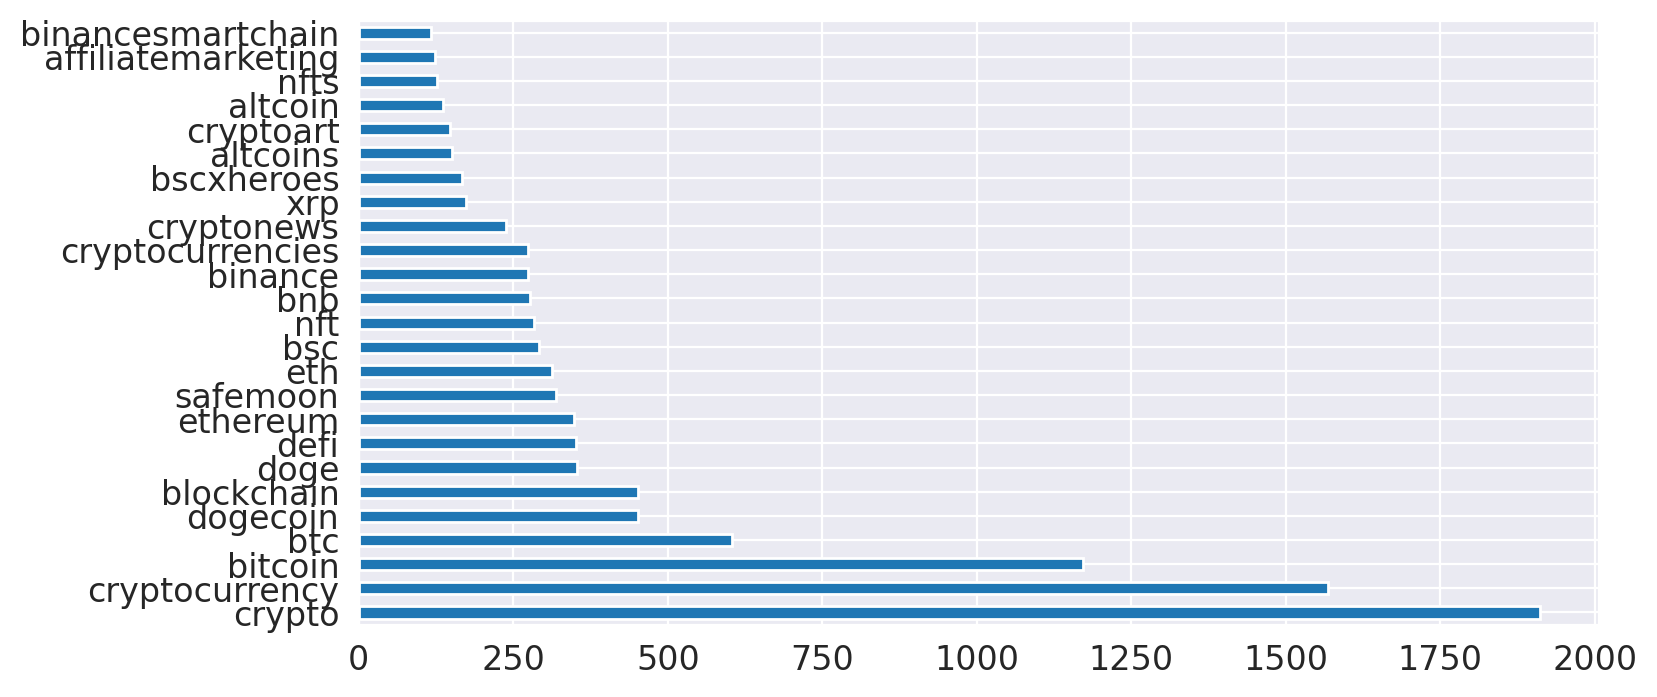

In [25]:
df['Entities'] = df['entities.hashtags'].apply(extract_entities)
pd.Series(np.concatenate(df['Entities'])).value_counts()[:25].plot(kind='barh')

In [26]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweets = tweepy.Cursor(api.user_timeline,
                       screen_name='MercedesAMGF1',
                       lang="en",
                       tweet_mode='extended',
                       count=100).items(5000)

retrieved_tweets = [tweet._json for tweet in tweets]
df = pd.io.json.json_normalize(retrieved_tweets)
print('Number of retrieved tweets {}'.format(len(df)))

Number of retrieved tweets 3248


In [27]:
def get_user_timeline(screen_name):
    api = tweepy.API(auth,
                     wait_on_rate_limit=True,
                     wait_on_rate_limit_notify=True)
    tweets = tweepy.Cursor(api.user_timeline,
                           screen_name=screen_name,
                           lang="en",
                           tweet_mode='extended',
                           count=200).items()
    retrieved_tweets = [tweet._json for tweet in tweets]
    df = pd.io.json.json_normalize(retrieved_tweets)
    df = df[~df['retweeted_status.id'].isna()]
    return df

In [28]:
df_mercedes = get_user_timeline('MercedesAMGF1')
print('Number of Tweets from Mercedes {}'.format(len(df_mercedes)))
df_ferrari = get_user_timeline('ScuderiaFerrari')
print('Number of Tweets from Ferrari {}'.format(len(df_ferrari)))

Number of Tweets from Mercedes 143
Number of Tweets from Ferrari 88


In [29]:
import regex as re
import nltk
from collections import Counter
from wordcloud import WordCloud

stopwords = set(nltk.corpus.stopwords.words('english'))
RE_LETTER = re.compile(r'\b\p{L}{2,}\b')

def tokenize(text):
    return RE_LETTER.findall(text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

In [30]:
def wordcloud_blueprint(df, colName, max_words, num_stopwords):
    # Step 1: Convert input text column into tokens
    df['tokens'] = df[colName].map(prepare)
    
    # Step 2: Determine the frequency of each of the tokens
    freq_df = count_words(df)
    
    # Step 3: Generate the wordcloud using the frequencies controlling for stopwords
    wordcloud(freq_df['freq'], max_words, stopwords=freq_df.head(num_stopwords).index)

<Figure size 2400x800 with 0 Axes>

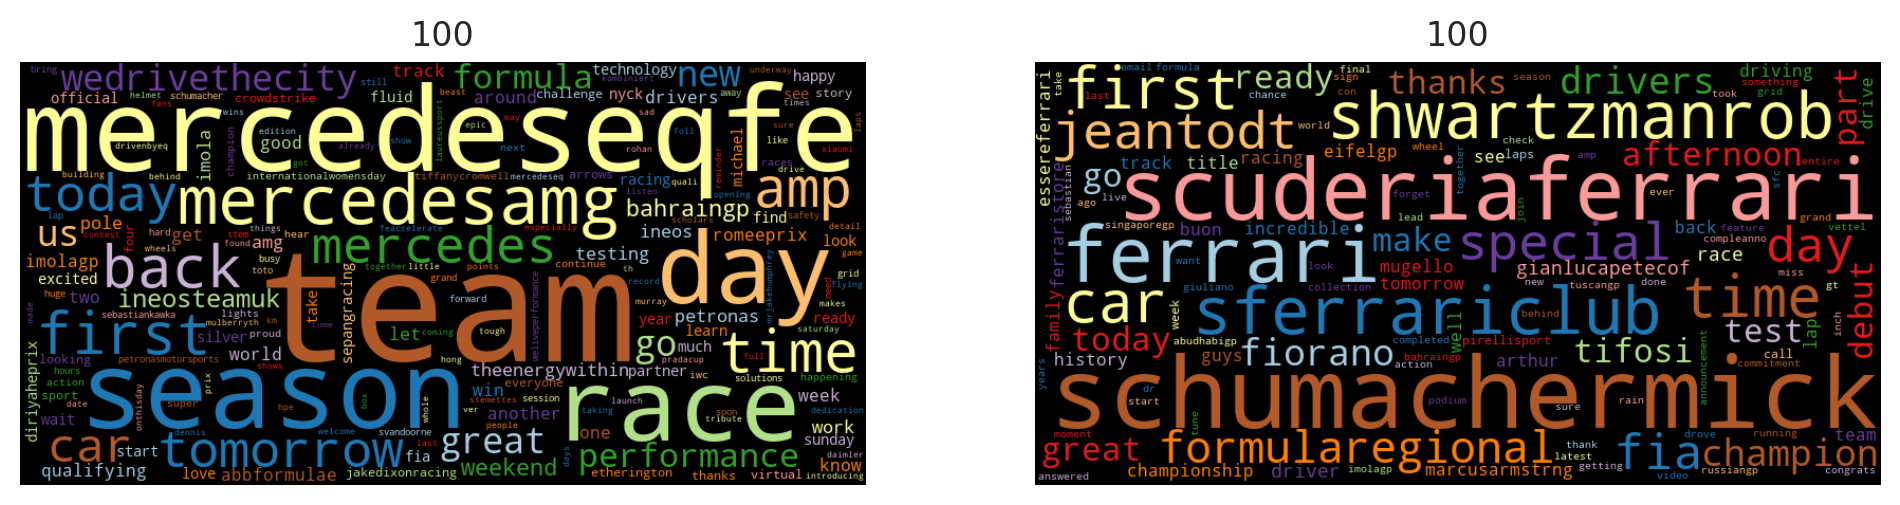

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
wordcloud_blueprint(df_mercedes, 'full_text',
                    max_words=100,
                    num_stopwords=5)

plt.subplot(1, 2, 2)
wordcloud_blueprint(df_ferrari, 'full_text',
                    max_words=100,
                    num_stopwords=5)

In [32]:
from datetime import datetime
import math

class FileStreamListener(tweepy.StreamListener):
    
    def __init__(self, max_tweets=math.inf):
        self.num_tweets = 0
        self.TWEETS_FILE_SIZE = 10
        self.num_files = 0
        self.tweets = []
        self.max_tweets = max_tweets      
    
    def on_data(self, data):
        while (self.num_files * self.TWEETS_FILE_SIZE < self.max_tweets):
            self.tweets.append(json.loads(data))
            self.num_tweets += 1
            if (self.num_tweets < self.TWEETS_FILE_SIZE):
                return True
            else:
                filename = 'Tweets_' + str(datetime.now().time()) + '.txt'
                print(self.TWEETS_FILE_SIZE, 'Tweets saved to', filename)
                file = open(filename, "w")
                json.dump(self.tweets, file)
                file.close()
                self.num_files += 1
                self.tweets = []
                self.num_tweets = 0
                return True
        return False
        
    def on_error(self, status_code):
        if status_code == 420:
            print('Too many requests were made, please stagger requests')
            return False
        else:
            print('Error {}'.format(status_code))
            return False

In [33]:
user_access_token = 'YOUR_USER_ACCESS_TOKEN_HERE'
user_access_secret = 'YOUR_USER_ACCESS_SECRET_HERE'

app_api_key = 'CWIBFKPrcOU4GsdRr6J5fpaps'
app_api_secret_key = 'SghP0LINUECDj0PzIi1vmDfRtNopqJNfb5xd3fH7XpO9ZaEtme'

auth = tweepy.OAuthHandler(app_api_key, app_api_secret_key)
auth.set_access_token(user_access_token, user_access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [34]:
fileStreamListener = FileStreamListener(20)
fileStream = tweepy.Stream(auth=api.auth,
                           listener=fileStreamListener,
                           tweet_mode='extended')
fileStream.filter(track=['cryptocurrency'])

Error 401


In [36]:
if ON_COLAB:
    df = pd.json_normalize(json.load(open('ch02/Tweets_01:01:36.656960.txt')))
else:
    df = pd.json_normalize(json.load(open('Tweets_01:01:36.656960.txt')))
df.head(2)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,...,retweeted_status.quoted_status.filter_level,retweeted_status.quoted_status.lang,retweeted_status.quoted_status_permalink.url,retweeted_status.quoted_status_permalink.expanded,retweeted_status.quoted_status_permalink.display,retweeted_status.extended_tweet.full_text,retweeted_status.extended_tweet.display_text_range,retweeted_status.extended_tweet.entities.hashtags,retweeted_status.extended_tweet.entities.urls,retweeted_status.extended_tweet.entities.user_mentions,retweeted_status.extended_tweet.entities.symbols,quoted_status.entities.media,quoted_status.extended_entities.media,retweeted_status.extended_tweet.entities.media,retweeted_status.extended_tweet.extended_entities.media
0,Mon Nov 30 00:01:04 +0000 2020,1333199330656854020,1333199330656854020,RT @ConflictsW: More photos from inside the Venezuelan military cryptocurrency (Bitcoin) mine at Fuerte Tiuna\n#Venezuela https://t.co/4pe9i…,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",False,None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Nov 30 00:01:07 +0000 2020,1333199340249157635,1333199340249157635,#BTCUSD Market #1H timeframe on November 29 at 23:00 (UTC) is #Bullish. #cryptocurrency #bitcoin #btc #crypto… https://t.co/4iI7wjSVG8,"<a href=""http://bitcoin.25mordad.com/"" rel=""nofollow"">cryptanalyser</a>",True,None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
import wikipediaapi

wiki_wiki = wikipediaapi.Wikipedia(
        language='en',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)

p_wiki = wiki_wiki.page('Cryptocurrency')
print(p_wiki.text[:200], '....')

A cryptocurrency, crypto-currency, or crypto is a digital asset designed to work as a medium of exchange wherein individual coin ownership records are stored in a ledger existing in a form of a comput ....


# Closing Remarks